V723 Cas lightcurve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

#defing frequency 5
f5 = (	 
[50430, 	5.0,	2.3,	0.5],	

[50473, 	5.0,	2.4,	0.4],	

[50876, 	5.0,	7.0,	0.2],		

[51154, 	5.0,	8.2,	0.5],	

[51601,	5.0,	7.9,	0.4],

[51650,	5.0,	13.5,	0.9],

[51938,	5.0,	6.3,	1.1],
     
[52063,	5.0,	4.0,	0.7],

[52208,	5.0,	5.4,	0.3],
)

#defining frequency 1.66
f1_66 = ([50909,	1.66,	4.3,	0.3],)


#making the dataframes fro both frequencies
df5 =  pd.DataFrame(f5, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)"])

df1_66 =  pd.DataFrame(f1_66, columns = ["MJD",	"Freq (GHz)",	"Flux (mJy)",	"eFlux (mJy)"])

In [3]:
#defining/making the days, flux and error in flux for each frequency 
#the days is found by the MJdate in the data - MJdate of the beginibg of the eruption (Aug 24th 1995)
days5 = df5['MJD']-49953
flux5 = df5["Flux (mJy)"]
flux_err5 = np.sqrt(df5["eFlux (mJy)"]**2 + (df5["Flux (mJy)"]*0.05)**2)

days1_66 = df1_66['MJD']-49953
flux1_66 = df1_66["Flux (mJy)"]
flux_err1_66 = np.sqrt(df1_66["eFlux (mJy)"]**2 + (df1_66["Flux (mJy)"]*0.05)**2)

In [4]:
print(flux_err5)

0    0.513055
1    0.417612
2    0.403113
3    0.646607
4    0.562161
5    1.125000
6    1.144214
7    0.728011
8    0.403609
dtype: float64


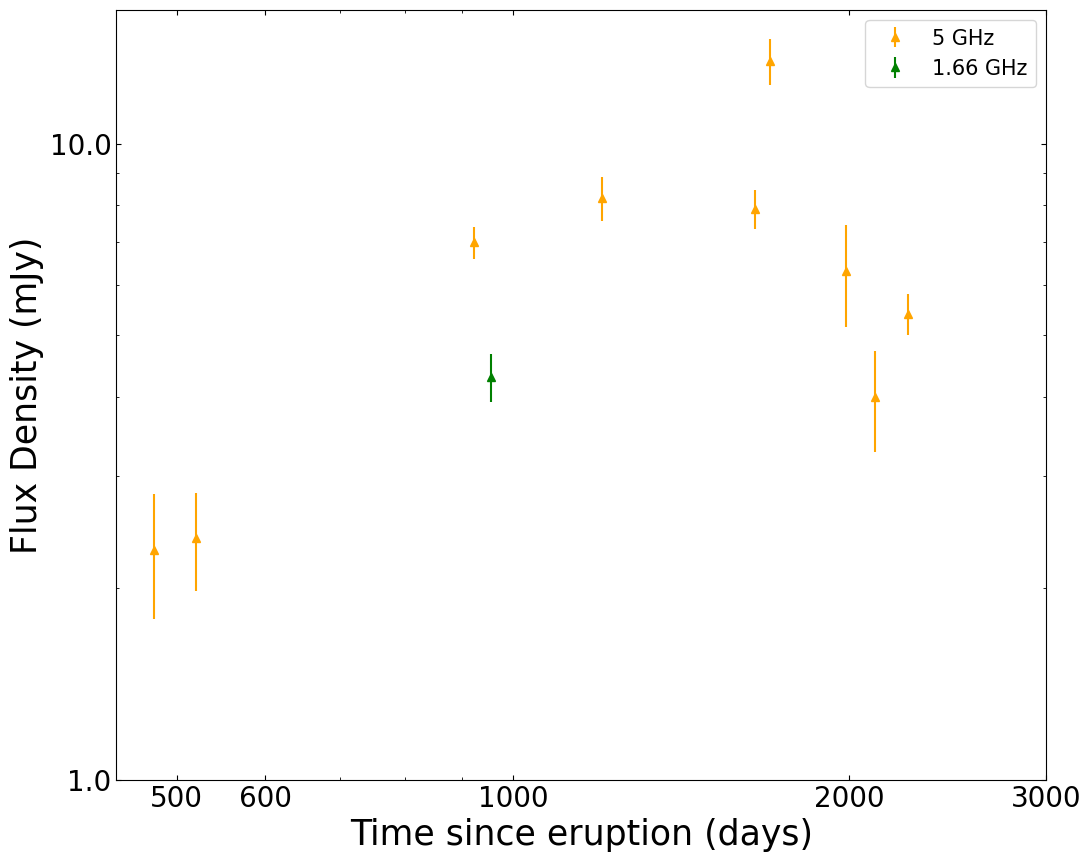

In [7]:
#defining the figure and fig size
fig, ax = plt.subplots()
fig.set_size_inches(12,10)

# Store which labels have already been used
used_labels = set()

#function to sort the non-detections vs the detections
def plot(days, fluxes, errors, color, label_name):
    for day, flux, err in zip(days, fluxes, errors):
        if flux < 3 * err:
            fmt = 'x'  # square for non-detection
            label = None  # no label for non-detections

            ax.errorbar(day, (flux+err*3), fmt=fmt, color=color, label=label)
            
        else:
            fmt = '^'  # triangle for detection
            label = label_name if label_name not in used_labels else None
        
            ax.errorbar(day, flux, yerr=err, fmt=fmt, color=color, label=label)
        
        if label:
            used_labels.add(label)

# Plot each band
plot(days5, flux5, flux_err5, 'orange', '5 GHz')
plot(days1_66, flux1_66, flux_err1_66, 'green', '1.66 GHz')

#Final plot formatting
ax.set_xscale('log')
ax.set_xticks([500,600,1000,2000,3000], labels = ['500','600','1000', '2000', '3000'], fontsize = 20)
ax.set_yscale('log')
ax.set_yticks([1,10], labels = ['1.0','10.0'], fontsize = 20)
ax.set_xlabel("Time since eruption (days)", fontsize =25)
ax.set_ylabel("Flux Density (mJy)", fontsize = 25)

ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax.set_title("")
plt.legend(fontsize = 15)
plt.savefig("V723_lc.png")
plt.show()